In [1]:
import numpy as np
import struct

In [156]:
file_path = "/Users/phoenix/tubCloud/Software/OTA-C/cpp/storage/rx_file_3.dat"
sample_size = 8
with open(file_path, 'rb') as f:
    # Read the binary data
    binary_data = f.read()

num_samples = len(binary_data) // sample_size


In [157]:
# Unpack the binary data into complex numbers
samples = []
for i in range(num_samples):
    # Extract real and imaginary parts from the binary data
    real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
    # Create a complex number and append it to the list of samples
    samples.append(complex(real_part, imag_part))

In [158]:
samples = np.array(samples)

In [159]:
print(samples.shape)

(7000000,)


In [160]:
print(samples.dtype)

complex128


In [161]:
samples[0]

(-0.0012817770475521684+0.0003357035166118294j)

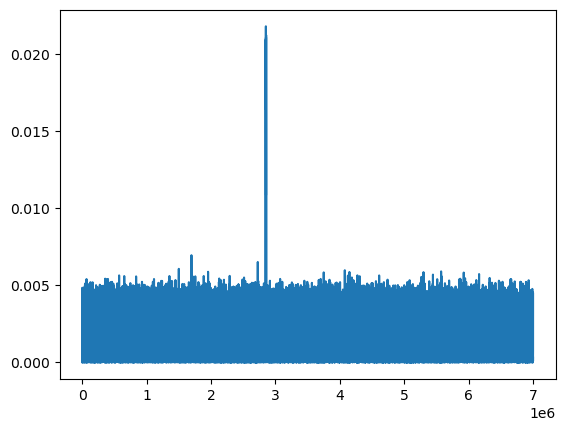

In [162]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

In [163]:
N = 721
M = 31
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
print(zfc_seq.shape)

(721,)


In [164]:
corr_zfc = np.correlate(samples, zfc_seq, mode='full')

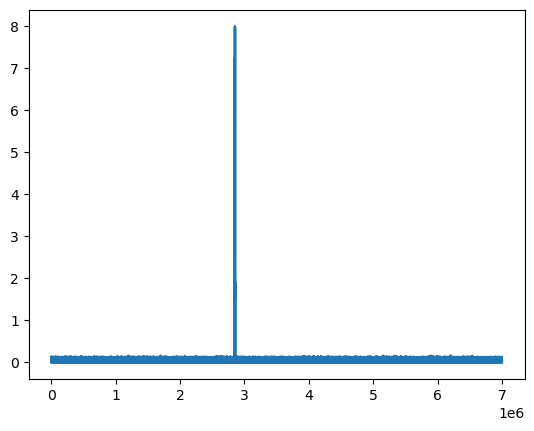

In [165]:
plt.plot(np.abs(corr_zfc))

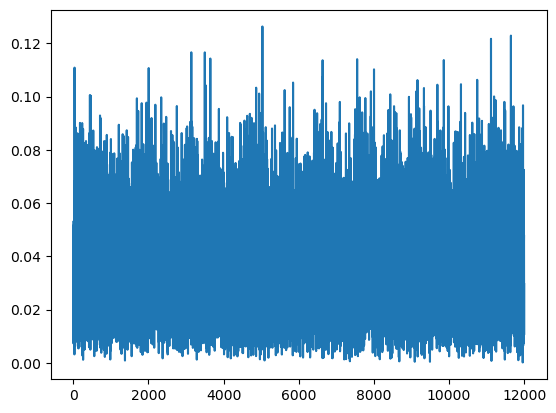

In [166]:
plt.plot(np.abs(corr_zfc)[int(2.2e6)+174000:int(2.2e6)+186000])

In [93]:
np.mean(np.abs(corr_zfc)[int(2.4e6):])

0.03642388769000378

In [94]:
np.max(np.abs(corr_zfc))

8.658554439552674

In [95]:
np.max(np.abs(corr_zfc))/np.mean(np.abs(corr_zfc)[int(2.4e6):])

237.7163721029411